In [1]:
import torch
import numpy as np
import cv2
from PIL import Image

In [2]:
import sys
sys.path.append('..')
from models import resnet50, densenet_121, resnet50_adv, resnet18, resnet18_seg
from utils import *

In [3]:
# checkpoint_path = '../checkpoints/mwd_resnet50/fold_0_model_best.pth.tar'
checkpoint_path = '../checkpoints/my_data_resnet50/fold_0_model_best.pth.tar'
model = resnet50()
checkpoint = torch.load(checkpoint_path)
model.load_state_dict(checkpoint['state_dict'])

<All keys matched successfully>

In [3]:
checkpoint_path = '../checkpoints/my_data_densenet121/fold_0_model_best.pth.tar'
model = densenet_121()
checkpoint = torch.load(checkpoint_path)
model.load_state_dict(checkpoint['state_dict'])

<All keys matched successfully>

In [3]:
checkpoint_path = '../checkpoints/my_data_densenet121_norm/fold_0_model_best.pth.tar'
model = densenet_121()
checkpoint = torch.load(checkpoint_path)
model.load_state_dict(checkpoint['state_dict'])

<All keys matched successfully>

In [3]:
checkpoint_path = '../checkpoints/my_data_resnet50_cs/fold_0_model_best.pth.tar'
model = resnet50_adv()
checkpoint = torch.load(checkpoint_path)
model.load_state_dict(checkpoint['state_dict'])

<All keys matched successfully>

In [3]:
checkpoint_path = '../checkpoints/my_data_v3_resnet18/fold_0_model_best.pth.tar'
model = resnet18()
checkpoint = torch.load(checkpoint_path)
model.load_state_dict(checkpoint['state_dict'])

<All keys matched successfully>

In [3]:
checkpoint_path = '../checkpoints/my_data_v3_densenet121/01_14_21_27_fold_0_model_best.pth.tar'
model = densenet_121()
checkpoint = torch.load(checkpoint_path)
model.load_state_dict(checkpoint['state_dict'])

<All keys matched successfully>

In [3]:
checkpoint_path = '../checkpoints/my_data_densenet121_transfer/fold_0_model_best.pth.tar'
model = densenet_121()
checkpoint = torch.load(checkpoint_path)
model.load_state_dict(checkpoint['state_dict'])

<All keys matched successfully>

In [4]:
checkpoint_path = '../checkpoints/my_data_v3_densenet121_transfer/fold_0_model_best.pth.tar'
model = densenet_121()
checkpoint = torch.load(checkpoint_path)
model.load_state_dict(checkpoint['state_dict'])

<All keys matched successfully>

In [3]:
checkpoint_path = '../checkpoints/my_data_v4_resnet18_seg/01_19_23_48_fold_0_model_best.pth.tar'
model = resnet18_seg()
checkpoint = torch.load(checkpoint_path)
model.load_state_dict(checkpoint['state_dict'])

<All keys matched successfully>

In [4]:
checkpoint_path = '../checkpoints/my_data_v4_resnet18_seg_transfer/01_21_09_52_fold_0_model_best.pth.tar'
model = resnet18_seg()
checkpoint = torch.load(checkpoint_path)
model.load_state_dict(checkpoint['state_dict'])

<All keys matched successfully>

In [3]:
checkpoint_path = '../checkpoints/my_data_v4_resnet18_seg_transfer_4class/01_20_23_34_fold_0_model_best.pth.tar'
model = resnet18_seg()
checkpoint = torch.load(checkpoint_path)
model.load_state_dict(checkpoint['state_dict'])

<All keys matched successfully>

In [4]:
checkpoint_path = '../checkpoints/my_data_v4_resnet18_seg_4classes/fold_0_model_best.pth.tar'
model = resnet18_seg()
checkpoint = torch.load(checkpoint_path)
model.load_state_dict(checkpoint['state_dict'])

<All keys matched successfully>

In [3]:
from collections import OrderedDict
checkpoint_path = '../checkpoints/my_data_v4_resnet18_4classes/01_21_16_46_fold_0_model_best.pth.tar'
model = resnet18()
checkpoint = torch.load(checkpoint_path)
state_dict = checkpoint['state_dict']
new_state_dict = OrderedDict()
for k, v in state_dict.items():
    name = k.replace('module.','') # remove `module.`
    new_state_dict[name] = v
# load params
model.load_state_dict(new_state_dict)

<All keys matched successfully>

In [5]:
from collections import OrderedDict
checkpoint_path = '../checkpoints/my_data_v4_resnet18/01_21_15_09_fold_0_model_best.pth.tar'
model = resnet18()
checkpoint = torch.load(checkpoint_path)
state_dict = checkpoint['state_dict']
new_state_dict = OrderedDict()
for k, v in state_dict.items():
    name = k.replace('module.','') # remove `module.`
    new_state_dict[name] = v
# load params
model.load_state_dict(new_state_dict)

RuntimeError: Error(s) in loading state_dict for ResNet:
	size mismatch for fc.weight: copying a param with shape torch.Size([6, 512]) from checkpoint, the shape in current model is torch.Size([5, 512]).
	size mismatch for fc.bias: copying a param with shape torch.Size([6]) from checkpoint, the shape in current model is torch.Size([5]).

In [3]:
from collections import OrderedDict
checkpoint_path = '../checkpoints/my_data_v5_resnet18_seg/01_28_09_51_fold_0_model_best.pth.tar'
model = resnet18_seg()
checkpoint = torch.load(checkpoint_path)
state_dict = checkpoint['state_dict']
new_state_dict = OrderedDict()
for k, v in state_dict.items():
    name = k.replace('module.','') # remove `module.`
    new_state_dict[name] = v
# load params
model.load_state_dict(new_state_dict)

<All keys matched successfully>

In [4]:
# 加载真实路面数据集
from dataset import MWD, MWD_Adv
from dataset import MyData, MyDataCS, MyDataSeg
from torchvision import transforms
import matplotlib.pyplot as plt
import itertools

In [6]:
# mean = [0.5, 0.5, 0.5]
# std = [0.5, 0.5, 0.5]
mean=[0.485, 0.456, 0.406]
std=[0.229, 0.224, 0.225]
image_size = 224
img_size = (576, 720)
transform = transforms.Compose([
    # transforms.Resize((image_size, image_size)),
    transforms.Resize(img_size),
    transforms.ToTensor(),
    # transforms.Normalize(mean, std)
])

# dataset = MWD(root_path="G:\\weather_recognition\\groud_truth", transform=transform)
# dataset = MWD_Adv(root_path="G:\\weather_recognition\\groud_truth", transform=transform)

# train_dataset = MyData(root_path=args.train_path, transform=train_transform)
# dataset = MyData(root_path="G:\\vscode_workspace\\Weather_Recognition\\data_split_v2\\test\\", transform=transform)
# dataset = MyData(root_path="G:\\vscode_workspace\\Weather_Recognition\\data_01_11\\", transform=transform)
# dataset = MyDataCS(root_path="G:\\vscode_workspace\\Weather_Recognition\\data_01_11\\", transform=transform)
# dataset = MyData(root_path="G:\\vscode_workspace\\Weather_Recognition\\data_split_v4\\test\\", transform=transform)
# dataset = MyDataSeg(root_path="G:\\vscode_workspace\\Weather_Recognition\\data_split_v4\\test\\", transform=transform)
# dataset = MyData(root_path="G:\\vscode_workspace\\Weather_Recognition\\data_split_v4\\test\\", transform=transform)
dataset = MyDataSeg(root_path="G:\\vscode_workspace\\Weather_Recognition\\data_split_v5\\test\\", transform=transform)

In [7]:
print(len(dataset))
print(dataset[0][0].shape)

10292
torch.Size([3, 576, 720])


In [8]:
# img, true label, pred label 可视化

label_dict = {'cloudy': 0, 'haze': 1, 'rainy': 2, 'snow': 3, 'sunny': 4, 'thunder': 5}
label_list = ['cloudy', 'haze', 'rainy', 'snow', 'sunny', 'thunder']
def show_model_performance(images, labels, outputs, batch_idx=0):
    # print(images.shape, labels.shape, outputs.shape)
    _, figs = plt.subplots(1, 32, figsize=(96, 96))
    # print(len(figs))
    for f, img, lbl, pred in zip(figs, images, labels, outputs):
        img = np.transpose(img, (1, 2, 0))
        f.imshow(img)
        # print(lbl, pred)
        f.set_title(label_list[lbl] + ';' + label_list[pred[0]])
        f.axes.get_xaxis().set_visible(False)
        f.axes.get_yaxis().set_visible(False)
    
    fig = plt.gcf()
    fig.savefig('figs/show_performance_' + str(batch_idx) + '.png', format='png', transparent=True)

    plt.show()

In [9]:
# 绘制混淆矩阵

def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    Input
    - cm : 计算出的混淆矩阵的值
    - classes : 混淆矩阵中每一行每一列对应的列
    - normalize : True:显示百分比, False:显示个数
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    print(cm)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    fmt = '.2f' if normalize else '.0f'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

def compute_cm(cm, preds, labels):
    preds = torch.argmax(preds, 1)
    for p, t in zip(preds, labels):
        # if t == 2 and p == 1:
        #     print('miss!')
        # cm[p, t] += 1
        cm[t, p] += 1
    return cm

In [10]:
cnt = 0
def save_misclassify(inputs, targets, preds):
    global cnt
    save_dir = "misclassify_01_28_v5_resnet18_seg//"
    label_list = ['Cloud', 'Fog', 'Rainy', 'Snow', 'Sunny', 'Thunder']
    # label_list = ['Cloud/Sunny', 'Fog', 'Rainy', 'Snow']
    if not os.path.exists(save_dir):
        os.makedirs(save_dir)
    
    for img, t, p in zip(inputs, targets, preds):
        p = p[0]
        # print(img.shape, t, p)
        # break
        if t != p:
            img = np.transpose(img, (1, 2, 0))
            img = img * 255
            img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
            # print(img.shape)
            img_path = save_dir + '{0}_{1}_{2}.jpg'.format(cnt, label_list[t], label_list[p]) 
            cv2.imwrite(img_path, img)
            cnt = cnt + 1


79.30431403031481
[[1.293e+03 1.340e+02 8.000e+00 3.730e+02 2.930e+02 0.000e+00]
 [7.000e+00 2.172e+03 3.000e+00 0.000e+00 1.900e+01 0.000e+00]
 [1.680e+02 2.820e+02 6.940e+02 1.500e+01 1.930e+02 0.000e+00]
 [3.000e+00 0.000e+00 0.000e+00 1.987e+03 6.700e+01 0.000e+00]
 [4.980e+02 2.600e+01 3.900e+01 2.000e+00 2.016e+03 0.000e+00]
 [0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00]]
Normalized confusion matrix
[[6.15421228e-01 6.37791528e-02 3.80771061e-03 1.77534507e-01
  1.39457401e-01 0.00000000e+00]
 [3.18037256e-03 9.86824171e-01 1.36301681e-03 0.00000000e+00
  8.63243980e-03 0.00000000e+00]
 [1.24260355e-01 2.08579882e-01 5.13313609e-01 1.10946746e-02
  1.42751479e-01 0.00000000e+00]
 [1.45843461e-03 0.00000000e+00 0.00000000e+00 9.65969859e-01
  3.25717064e-02 0.00000000e+00]
 [1.92948470e-01 1.00736149e-02 1.51104223e-02 7.74893452e-04
  7.81092600e-01 0.00000000e+00]
 [           nan            nan            nan            nan
             nan            nan]]


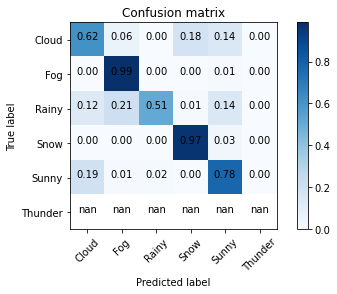

In [13]:
# 'cloudy': 0, 'haze': 1, 'rainy': 2, 'snow': 3, 'sunny': 4, 'thunder': 5
model = model.cuda()
model.eval()
top1 = AverageMeter()
data_iter = torch.utils.data.DataLoader(dataset, 4, shuffle=False)

# 混淆矩阵
num_classes = 6
label_list = ['Cloud', 'Fog', 'Rainy', 'Snow', 'Sunny', 'Thunder']

# num_classes = 5
# label_list = ['Cloud', 'Fog', 'Rainy', 'Snow', 'Sunny']

# num_classes = 4
# label_list = ['Cloud/Sunny', 'Fog', 'Rainy', 'Snow']


confuse_matrix = np.zeros([num_classes, num_classes])
for batch_idx, (inputs, inputs_seg, targets) in enumerate(data_iter):
    inputs, inputs_seg, targets = inputs.cuda(), inputs_seg.cuda(), targets.cuda()
    # inputs, targets = inputs.cuda(), targets.cuda()

    # outputs = model(inputs, inputs_seg)
    outputs = model(inputs, inputs_seg)

    # print(outputs)
    _, pred = outputs.topk(1, 1)
    # print(pred)
    # print(targets)
    confuse_matrix = compute_cm(confuse_matrix, outputs, targets)
    prec = accuracy(outputs.data, targets.data, topk=(1,))
    top1.update(prec[0].item(), inputs.size(0))
    save_misclassify(inputs.cpu().detach().numpy(), targets.cpu().detach().numpy(), pred.cpu().detach().numpy())
    # break
print(top1.avg)
print(confuse_matrix)
plot_confusion_matrix(confuse_matrix, label_list, normalize=True)
    # show_model_performance(inputs.cpu().detach().numpy(), targets.cpu().detach().numpy(), pred.cpu().detach().numpy(), batch_idx)
    # break

Confusion matrix, without normalization
[[3.124e+03 7.800e+01 0.000e+00 2.790e+02]
 [8.000e+01 5.300e+01 1.300e+01 1.000e+00]
 [2.860e+02 0.000e+00 3.190e+02 7.000e+00]
 [5.900e+01 0.000e+00 1.000e+00 1.997e+03]]


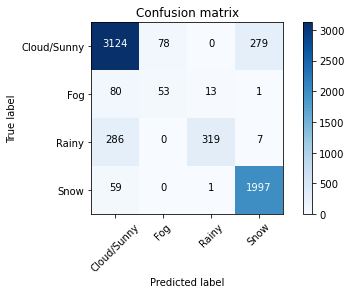

In [11]:
plot_confusion_matrix(confuse_matrix, label_list, normalize=False)

59.01323042998897
[[ 287.   56.    8.  140.  388.    0.]
 [   0.    0.    0.    0.    0.    0.]
 [   0.    0.    0.    0.    0.    0.]
 [  12.    0.    5.  107.   24.    0.]
 [ 735.    4.   27.   39. 1747.   49.]
 [   0.    0.    0.    0.    0.    0.]]
Normalized confusion matrix
[[0.32650739 0.06370876 0.00910125 0.1592719  0.44141069 0.        ]
 [       nan        nan        nan        nan        nan        nan]
 [       nan        nan        nan        nan        nan        nan]
 [0.08108108 0.         0.03378378 0.72297297 0.16216216 0.        ]
 [0.28258362 0.00153787 0.01038062 0.01499423 0.67166474 0.01883891]
 [       nan        nan        nan        nan        nan        nan]]


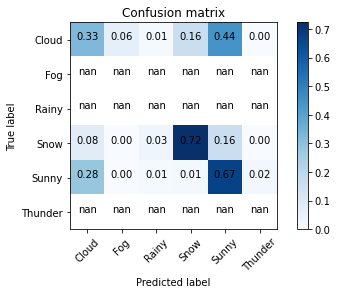

In [10]:
# 'cloudy': 0, 'haze': 1, 'rainy': 2, 'snow': 3, 'sunny': 4, 'thunder': 5
model = model.cuda()
model.eval()
top1 = AverageMeter()
data_iter = torch.utils.data.DataLoader(dataset, 16, shuffle=False)

# 混淆矩阵
num_classes = 6
label_list = ['Cloud', 'Fog', 'Rainy', 'Snow', 'Sunny', 'Thunder']
confuse_matrix = np.zeros([num_classes, num_classes])
for batch_idx, (inputs, targets, constrast, hist) in enumerate(data_iter):
    inputs, targets, constrast, hist = inputs.cuda(), targets.cuda(), constrast.cuda(), hist.cuda()

    outputs = model(inputs, constrast, hist)

    # print(outputs)
    _, pred = outputs.topk(1, 1)
    # print(pred)
    # print(targets)
    confuse_matrix = compute_cm(confuse_matrix, outputs, targets)
    prec = accuracy(outputs.data, targets.data, topk=(1,))
    top1.update(prec[0].item(), inputs.size(0))
    # save_misclassify(inputs.cpu().detach().numpy(), targets.cpu().detach().numpy(), pred.cpu().detach().numpy())
    # break
print(top1.avg)
print(confuse_matrix)
plot_confusion_matrix(confuse_matrix, label_list, normalize=True)
    # show_model_performance(inputs.cpu().detach().numpy(), targets.cpu().detach().numpy(), pred.cpu().detach().numpy(), batch_idx)
    # break

Normalized confusion matrix
[[0.24604013 0.19112988 0.00422386 0.11826822 0.43928194 0.00105597]
 [0.2556391  0.7443609  0.         0.         0.         0.        ]
 [0.35620915 0.00163399 0.49346405 0.         0.14869281 0.        ]
 [0.         0.         0.09274194 0.50403226 0.40322581 0.        ]
 [0.31603271 0.01528617 0.01564166 0.         0.651262   0.00177746]
 [0.         0.01992032 0.00796813 0.00398406 0.03187251 0.93625498]]


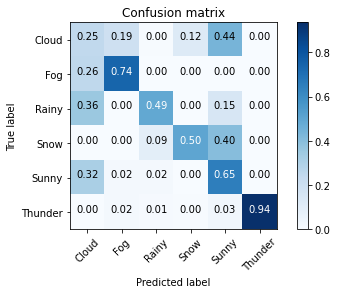

In [11]:
plot_confusion_matrix(confuse_matrix, label_list, normalize=True)

In [14]:
checkpoint_path


'../checkpoints/my_data_v3_densenet121/01_14_21_27_fold_0_model_best.pth.tar'